<h1> Project : United KingDom Road Accident Data Analysis </h1>
<h2> Inclusive Years : 2019-2022 </h2>
<h3> Analyst : Mark Khelvin Jay O. Cubilo </h3>

In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [117]:
accident = pd.read_csv('accident_data.csv')
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [118]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], errors = "coerce")
accident.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
dtype: object

In [119]:
accident['Accident Date']

0        2019-05-06
1        2019-02-07
2               NaT
3               NaT
4        2019-03-09
            ...    
660674          NaT
660675          NaT
660676          NaT
660677          NaT
660678          NaT
Name: Accident Date, Length: 660679, dtype: datetime64[ns]

In [120]:
acc_categor = accident.dropna(subset=["Accident_Severity", "Number_of_Casualties", "Number_of_Vehicles"])
acc_categor

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,2019-05-06,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2019-02-07,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,NaT,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,NaT,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,2019-03-09,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,NaT,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,NaT,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,NaT,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,NaT,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h1>Data Cleansing</h1>

In [121]:
accident['Latitude'] =  accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] =  accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'] =  accident['Road_Surface_Conditions'].fillna('Unknown Surface Conditiion')
accident['Road_Type'] =  accident['Road_Type'].fillna('Unaccounted')
accident['Weather_Conditions'] =  accident['Weather_Conditions'].fillna('Unaccounted')
accident['Urban_or_Rural_Area'] =  accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])

In [122]:
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['Latitude'] = accident['Latitude'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['District Area'] = accident['District Area'].astype('category')
accident['Longitude'] = accident['Longitude'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')

In [123]:
accident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                         category
Light_Conditions                 category
District Area                    category
Longitude                        category
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

<h1>Extracting Date Info with Pandas date/time</h1>

In [124]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['Day_Of_Week'] = accident['Accident Date'].dt.dayofweek
accident.isnull().sum()

Index                           0
Accident_Severity               0
Accident Date              395672
Latitude                        0
Light_Conditions                0
District Area                   0
Longitude                       0
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions         0
Road_Type                       0
Urban_or_Rural_Area             0
Weather_Conditions              0
Vehicle_Type                    0
Year                       395672
Month                      395672
Day                        395672
Day_Of_Week                395672
dtype: int64

<h1 style="color:purple;">Insight 1</h1>
<h3>Top 30 District with Serious Accident</h3>

In [125]:
severity_counts = accident[accident['Accident_Severity'] == 'Serious']['District Area'].value_counts().T.head(30)
severity_counts

District Area
Birmingham                     1474
Leeds                          1147
Westminster                     926
Bradford                        802
Sheffield                       749
Glasgow City                    739
Liverpool                       709
East Riding of Yorkshire        676
Manchester                      666
Lambeth                         612
Kirklees                        596
Nottingham                      565
Southwark                       550
Wakefield                       543
Brighton and Hove               542
Bristol, City of                486
Edinburgh, City of              478
Barnet                          474
Wirral                          472
Doncaster                       470
Wandsworth                      467
Aberdeenshire                   463
Hackney                         450
Tower Hamlets                   440
Camden                          440
Kingston upon Hull, City of     430
Croydon                         419
Lewisham      

<h1 style="color:purple;">Insight 1</h1>
<h3>Top 30 District with Serious Accident Graph</h3>

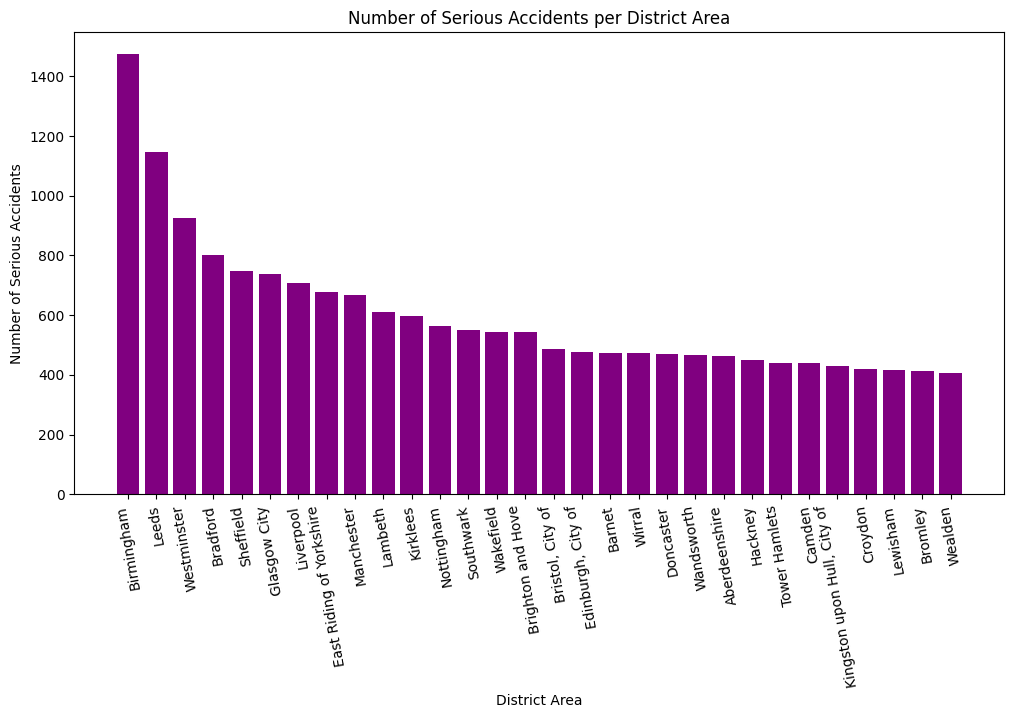

In [126]:
severity_counts = accident[accident['Accident_Severity'] == 'Serious']['District Area'].value_counts().T.head(30)
plt.figure(figsize=(12, 6))
plt.bar(severity_counts.index, severity_counts.values, color='purple')
plt.title('Number of Serious Accidents per District Area')
plt.xlabel('District Area')
plt.ylabel('Number of Serious Accidents')
plt.xticks(rotation=100)  # Rotate x-axis labels for better readability
plt.show()

<h1 style="color:purple;">Insight 2</h1>
<h3>Accidents by Light Conditions</h3>

In [127]:
acc_light = accident['Light_Conditions'].value_counts()
acc_light

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

<h1 style="color:purple;">Insight 2</h1>
<h3> Accidents by Light Conditions Graph </h3>

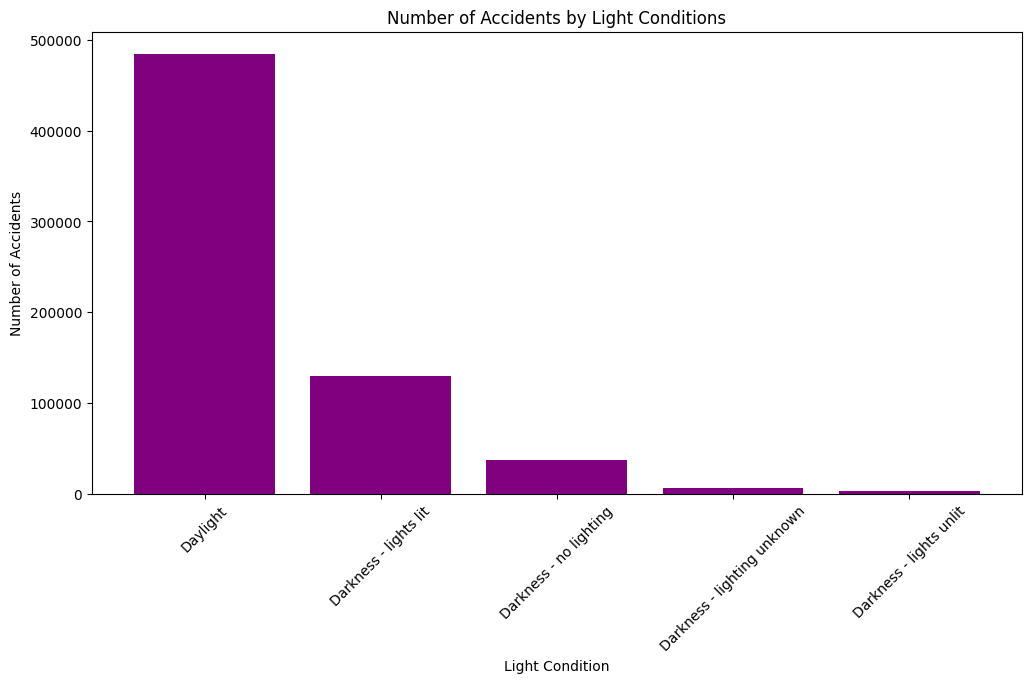

In [128]:
light_counts = accident['Light_Conditions'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(light_counts.index, light_counts.values, color='purple')
plt.title('Number of Accidents by Light Conditions')
plt.xlabel('Light Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

<h1 style="color:purple;">Insight 3</h1>
<h3> Most Common Road Type with the Most Accidents </h3>

In [129]:
road_count = accident['Road_Type'].value_counts()
road_count

Road_Type
Single carriageway    492143
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
Unaccounted             4520
Name: count, dtype: int64

<h1 style="color:purple;">Insight 3</h1>
<h3> Most Common Road Type with the Most Accidents Graph</h3>

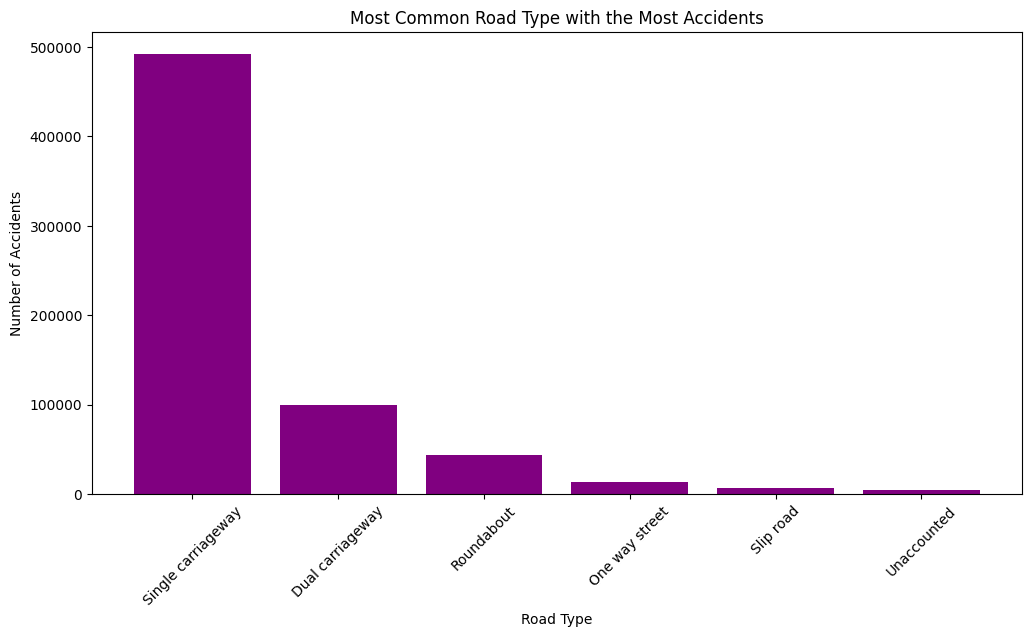

In [130]:
road_type_counts = accident['Road_Type'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(road_type_counts.index, road_type_counts.values, color='purple')
plt.title('Most Common Road Type with the Most Accidents')
plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

<h1 style="color:purple;">Insight 4</h1>
<h3>Number of accidents per district (top 5)</h3>

In [131]:
top_districts = accident["District Area"].value_counts().head(5)
top_districts

District Area
Birmingham    13491
Leeds          8898
Manchester     6720
Bradford       6212
Sheffield      5710
Name: count, dtype: int64

<h1 style="color:purple;">Insight 4</h1>
<h3>Number of accidents per district (top 5)</h3>

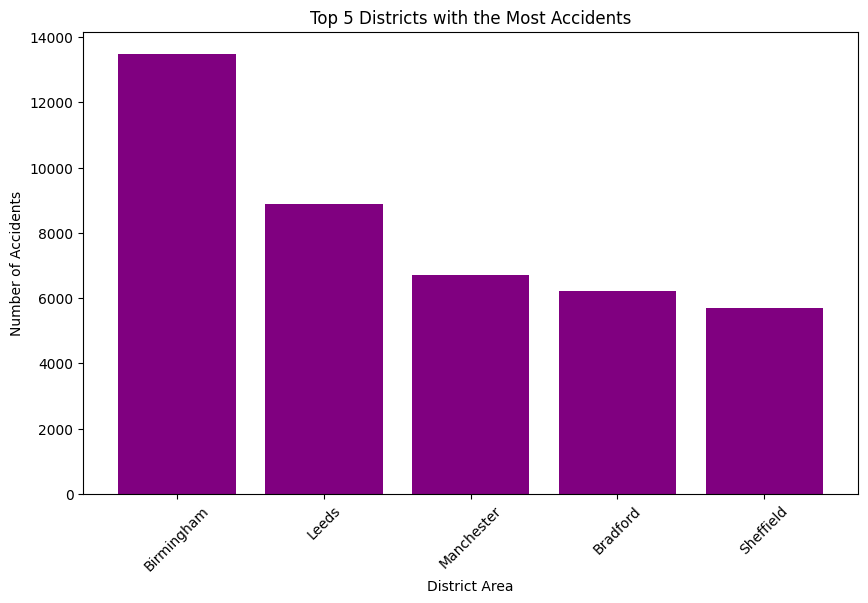

In [132]:
top_districts = accident['District Area'].value_counts().head(5)
plt.figure(figsize=(10, 6))
plt.bar(top_districts.index, top_districts.values, color='purple')
plt.title('Top 5 Districts with the Most Accidents')
plt.xlabel('District Area')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

<h1 style="color:purple;">Insight 5</h1>
<h3>Most Common Vehicle Type per Accident Severity</h3>

In [133]:
Sev_vehicle = accident.groupby(['Accident_Severity', 'Vehicle_Type']).size().unstack().T.head(10)
Sev_vehicle

Accident_Severity,Fatal,Serious,Slight
Vehicle_Type,,,
Agricultural vehicle,21,282,1644
Bus or coach (17 or more pass seats),325,3373,22180
Car,6577,66461,424954
Data missing or out of range,0,0,6
Goods 7.5 tonnes mgw and over,216,2321,14770
Goods over 3.5t. and under 7.5t,67,857,5172
Minibus (8 - 16 passenger seats),29,276,1671
Motorcycle 125cc and under,189,2031,13049
Motorcycle 50cc and under,95,1014,6494


<h1 style="color:purple;">Insight 5</h1>
<h3>Most Common Vehicle Type per Accident Severity Graph</h3>

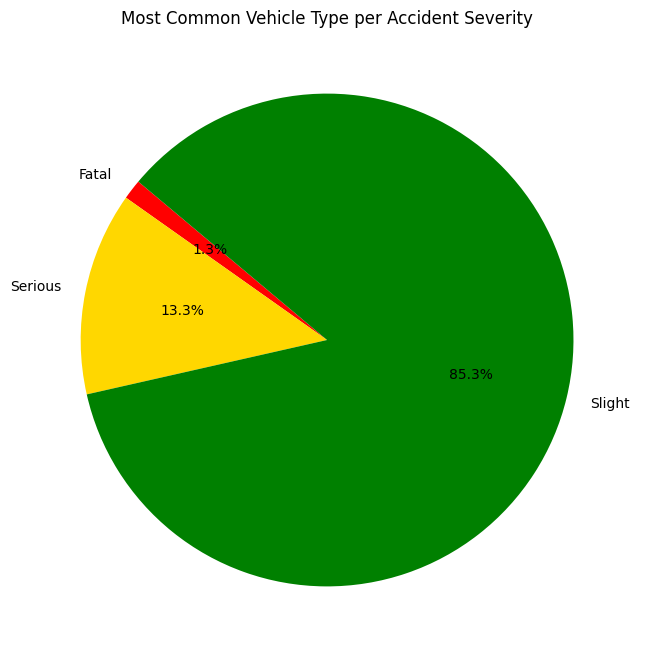

In [134]:
Sev_vehicle = accident.groupby(['Accident_Severity', 'Vehicle_Type']).size().unstack().T.head(10).sum()
plt.figure(figsize=(15, 8))
plt.pie(Sev_vehicle.values, labels=Sev_vehicle.index, autopct='%1.1f%%', startangle=140, colors=['red', 'gold', 'green'])
plt.title('Most Common Vehicle Type per Accident Severity')
plt.show()

<h1 style="color:purple;">Insight 6</h1>
<h3>Number of accidents over the years</h3>

In [135]:
yr_acci = accident['Accident Date'].dt.year.value_counts().sort_index()
yr_acci

Accident Date
2019.0    71867
2020.0    70163
2021.0    66172
2022.0    56805
Name: count, dtype: int64

<h1 style="color:purple;">Insight 6</h1>
<h3>Number of accidents over the years Graph</h3>

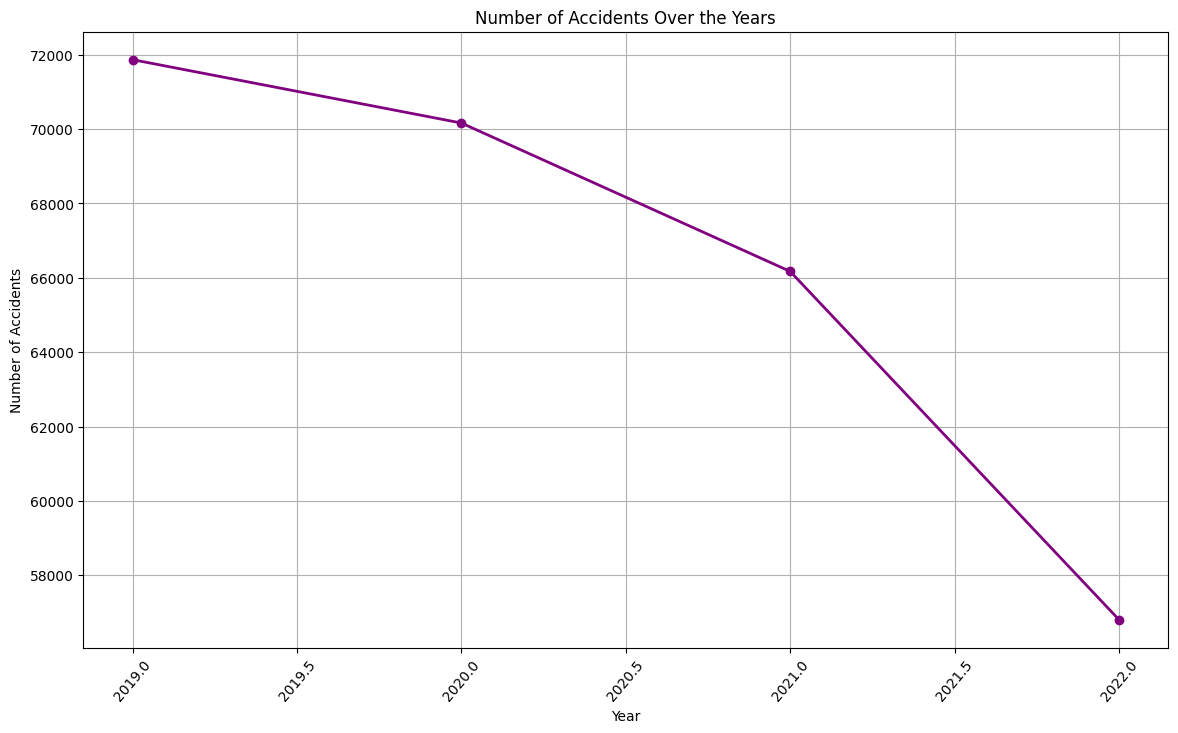

In [136]:
yr_acci = accident['Accident Date'].dt.year.value_counts().sort_index()
plt.figure(figsize=(14, 8))
plt.plot(yr_acci.index, yr_acci.values, color='purple', marker='o', linestyle='-', linewidth=2)
plt.title('Number of Accidents Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=50)
plt.grid(True)
plt.show()

<h1 style="color:purple;">Insight 7</h1>
<h3>Number of Accidents per Day of the Week </h3>

In [137]:
d_count = accident['Accident Date'].dt.day_name().value_counts().T
d_count

Accident Date
Tuesday      39701
Friday       38511
Thursday     38009
Sunday       37772
Saturday     37751
Wednesday    37548
Monday       35715
Name: count, dtype: int64

<h1 style="color:purple;">Insight 7</h1>
<h3>Number of Accidents per Day of the Week Graph</h3>

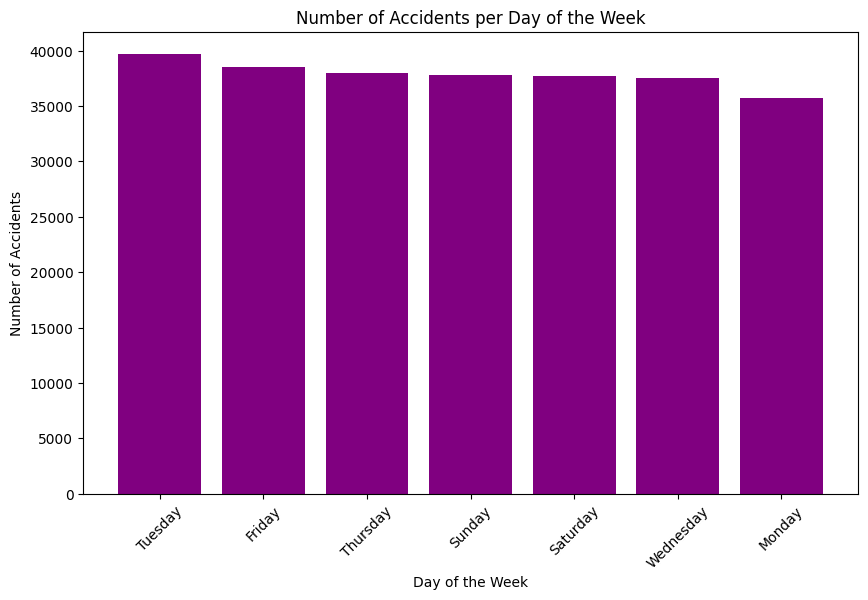

In [138]:
d_count = accident['Accident Date'].dt.day_name().value_counts().T
plt.figure(figsize=(10, 6))
plt.bar(d_count.index, d_count.values, color='purple')
plt.title('Number of Accidents per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

<h1 style='color:purple'> Insight No.8 </h1>
<h3> Average Number of Casualties in Different Weather Conditions Graph </h3>

In [139]:
weather_casualties = accident.groupby('Weather_Conditions')['Number_of_Casualties'].mean()
weather_casualties

Weather_Conditions
Fine + high winds        1.386018
Fine no high winds       1.350480
Fog or mist              1.452948
Other                    1.354869
Raining + high winds     1.416641
Raining no high winds    1.408214
Snowing + high winds     1.418079
Snowing no high winds    1.341776
Unaccounted              1.233720
Name: Number_of_Casualties, dtype: float64

<h1 style='color:purple'> Insight No.8 </h1>
<h3> Average Number of Casualties in Different Weather Conditions Graph </h3>

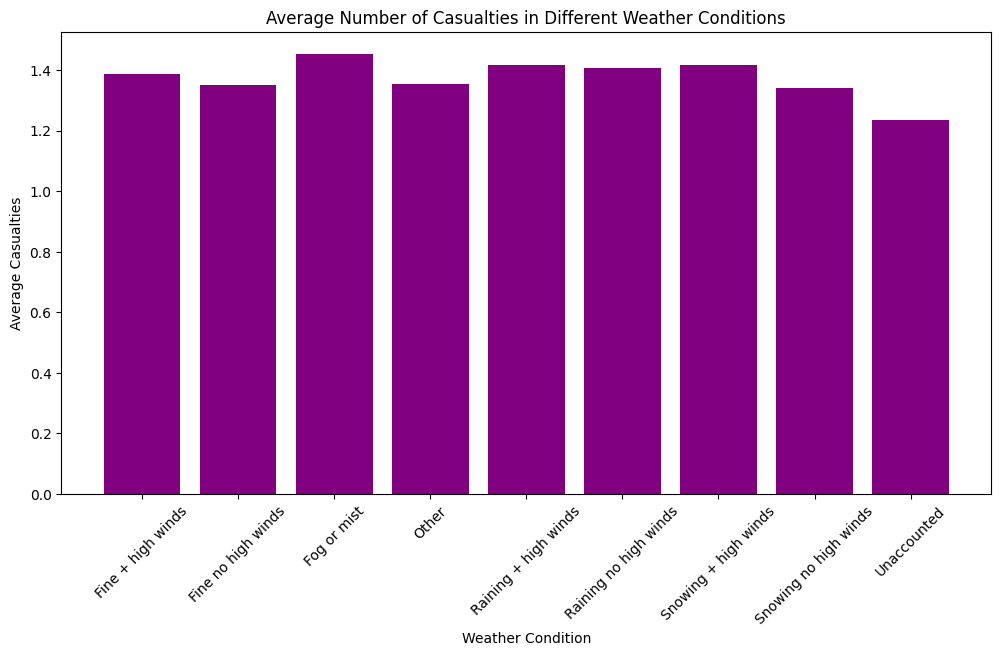

In [140]:
weather_casualties = accident.groupby('Weather_Conditions')['Number_of_Casualties'].mean()
plt.figure(figsize=(12, 6))
plt.bar(weather_casualties.index, weather_casualties.values, color='purple')
plt.title('Average Number of Casualties in Different Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Average Casualties')
plt.xticks(rotation=45)
plt.show()

<h1 style='color:purple'> Insight No.9 </h1>
<h3> Most Common Surface Condition with Fatal Accidents </h3>

In [141]:
surface_con = accident[accident['Accident_Severity'] == 'Fatal']['Road_Surface_Conditions'].value_counts().T
surface_con

Road_Surface_Conditions
Dry                           5788
Wet or damp                   2620
Frost or ice                   193
Snow                            35
Flood over 3cm. deep            23
Unknown Surface Conditiion       2
Name: count, dtype: int64

<h1 style='color:purple'> Insight No.9 </h1>
<h3> Most Common Surface Condition with Fatal Accidents Graph</h3>

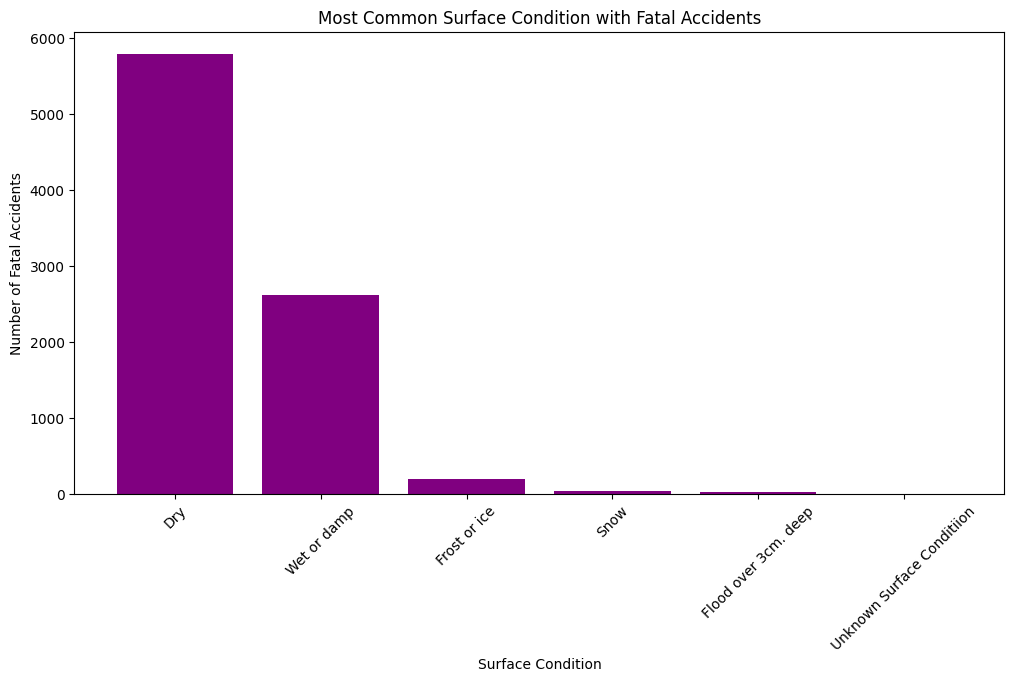

In [142]:
surface_con = accident[accident['Accident_Severity'] == 'Fatal']['Road_Surface_Conditions'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(surface_con.index, surface_con.values, color='purple')
plt.title('Most Common Surface Condition with Fatal Accidents')
plt.xlabel('Surface Condition')
plt.ylabel('Number of Fatal Accidents')
plt.xticks(rotation=45)
plt.show()

<h1 style='color:purple'> Insight No.10 </h1>
<h3>  Road Type with the Highest Average Casualty Count </h3>

In [143]:
road_casualty = accident.groupby('Road_Type')['Number_of_Casualties'].mean().idxmax()
road_casualty

'Dual carriageway'

<h1 style='color:purple'> Insight No.10 </h1>
<h3>  Road Type with the Highest Average Casualty Count Graph </h3>

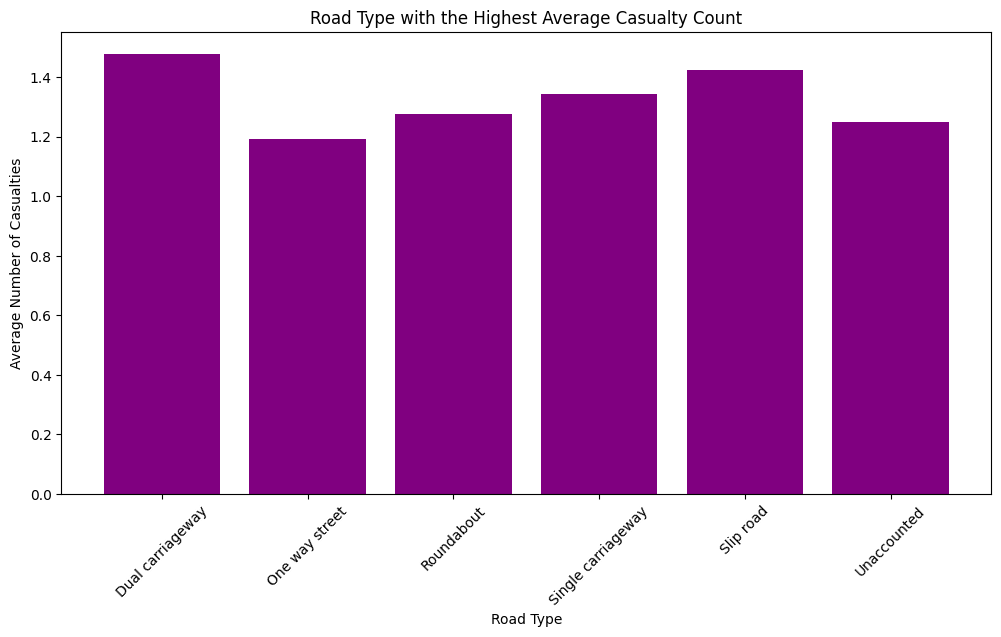

In [144]:
road_casualty = accident.groupby('Road_Type')['Number_of_Casualties'].mean().idxmax()
road_casualty = accident.groupby('Road_Type')['Number_of_Casualties'].mean()
plt.figure(figsize=(12, 6))
plt.bar(road_casualty.index, road_casualty.values, color='purple')
plt.title(f'Road Type with the Highest Average Casualty Count')
plt.xlabel('Road Type')
plt.ylabel('Average Number of Casualties')
plt.xticks(rotation=45)
plt.show()

<h1 style="color:purple;">Insight 11</h1>
<h3>Proportion of Accidents In The Urban vs Rural Places</h3>

In [145]:
urban_rural_count = accident['Urban_or_Rural_Area'].value_counts()
urban_rural_count

Urban_or_Rural_Area
Urban          421678
Rural          238990
Unallocated        11
Name: count, dtype: int64

<h1 style="color:purple;">Insight 11</h1>
<h3>Proportion of Accidents In The Urban vs Rural Places Graph</h3>

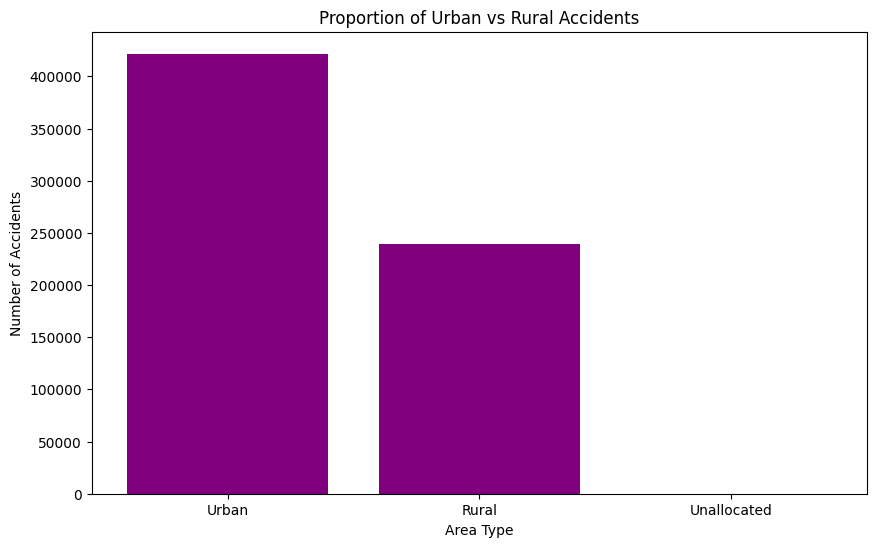

In [146]:
urban_rural_count = accident['Urban_or_Rural_Area'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(urban_rural_count.index, urban_rural_count.values, color='purple')
plt.title('Proportion of Urban vs Rural Accidents')
plt.xlabel('Area Type')
plt.ylabel('Number of Accidents')
plt.show()

<h1 style="color:purple;">Insight 12</h1>
<h3>Most Common Weather Condition During Accidents</h3>

In [147]:
weather_count = accident['Weather_Conditions'].value_counts()
common_weather = weather_count.idxmax()
weather_count
common_weather

'Fine no high winds'

<h1 style="color:purple;">Insight 12</h1>
<h3>Most Common Weather Condition During Accidents Graph</h3>

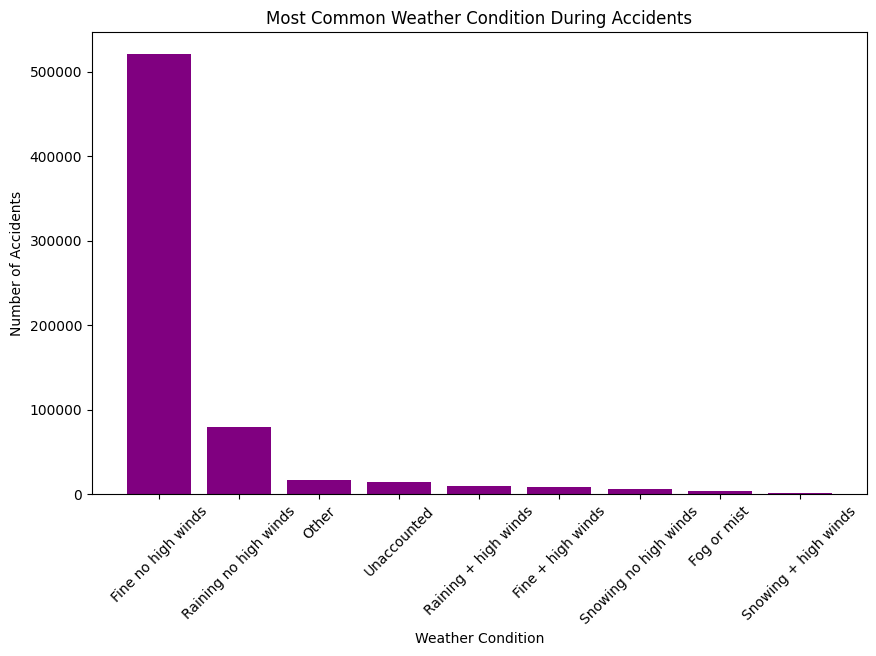

In [148]:
common_weather = accident['Weather_Conditions'].mode()[0]
weather_count = accident['Weather_Conditions'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(weather_count.index, weather_count.values, color='purple')
plt.title('Most Common Weather Condition During Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

<h1 style="color:purple;">Insight 12</h1>
<h3>Top 5 District With The Highest Number Of Accidents in Year 2020</h3>

In [150]:
acci_2020 = accident[accident['Year'] == 2020]
acci_2020_counts = acci_2020['District Area'].value_counts().head(5)
acci_2020
acci_2020_counts

District Area
Birmingham      1438
Leeds            921
Manchester       721
Glasgow City     676
Sheffield        600
Name: count, dtype: int64

<h1 style="color:purple;">Insight 12</h1>
<h3>Top 5 District With The Highest Number Of Accidents in Year 2020</h3>

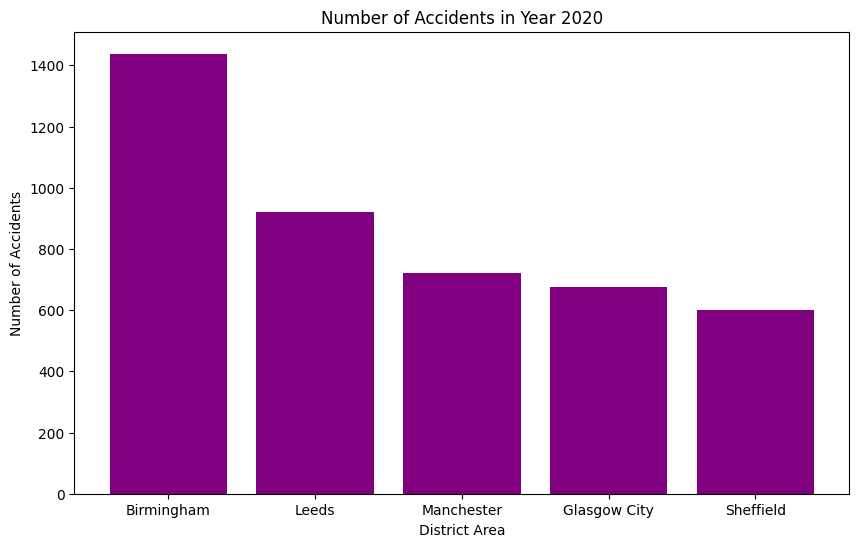

In [151]:
acci_2020 = accident[accident['Year'] == 2020]
acci_2020_counts = acci_2020['District Area'].value_counts().head(5)
plt.figure(figsize=(10, 6))
plt.bar(acci_2020_counts.index, acci_2020_counts.values, color='purple')
plt.title('Number of Accidents in Year 2020')
plt.xlabel('District Area')
plt.ylabel('Number of Accidents')
plt.show()



<h1 style="color:purple;">Insight 13</h1>
<h3>What Month Has The Most Accidents</h3>

In [152]:
month_counts = accident['Accident Date'].dt.month.value_counts().sort_index()
print(f"Accident occurrences per month:\n{month_counts}")

Accident occurrences per month:
Accident Date
1.0     22606
2.0     21815
3.0     21540
4.0     21699
5.0     22409
6.0     21974
7.0     21431
8.0     21914
9.0     22252
10.0    22328
11.0    22503
12.0    22536
Name: count, dtype: int64


<h1 style="color:purple;">Insight 13</h1>
<h3>What Month Has The Most Accidents Graph</h3>

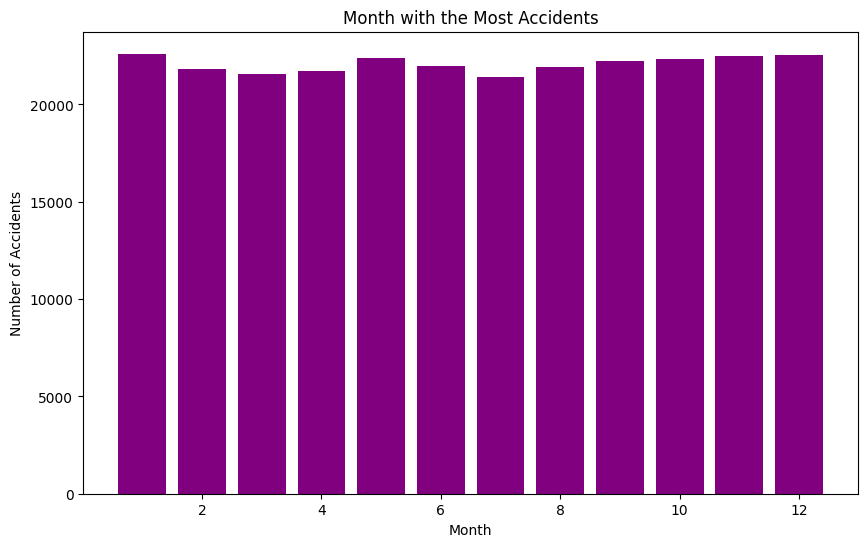

In [153]:
plt.figure(figsize=(10, 6))
plt.bar(month_counts.index, month_counts.values, color='purple')
plt.title('Month with the Most Accidents')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


<h1 style="color:purple;">Insight 14</h1>
<h3> Average Number of Vehicles Per Severity Type </h3>

In [154]:
avg_vehicles_sev = accident.groupby('Accident_Severity')['Number_of_Vehicles'].mean()
avg_vehicles_sev

Accident_Severity
Fatal      1.786976
Serious    1.678327
Slight     1.855864
Name: Number_of_Vehicles, dtype: float64

<h1 style="color:purple;">Insight 14</h1>
<h3> Average Number of Vehicles Per Severity Type Graph </h3>

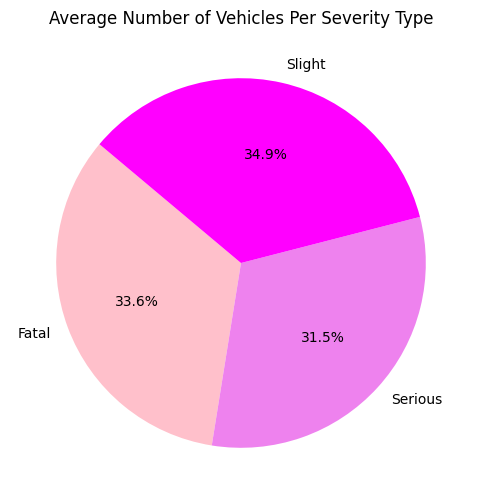

In [155]:
avg_vehicles_sev = accident.groupby('Accident_Severity')['Number_of_Vehicles'].mean()
plt.figure(figsize=(10, 6))
plt.pie(avg_vehicles_sev.values, labels=avg_vehicles_sev.index, autopct='%1.1f%%', startangle=140, colors=['pink', 'violet', 'magenta'])
plt.title('Average Number of Vehicles Per Severity Type')
plt.show()

<h1 style="color:purple;">Insight 15</h1>
<h3> Average Number of Vehicles Per Severity Type </h3>

In [156]:
rural_sev_count = accident[accident['Urban_or_Rural_Area'] == 'Rural']['Accident_Severity'].value_counts()
rural_sev_count

Accident_Severity
Slight     196077
Serious     37312
Fatal        5601
Name: count, dtype: int64

<h1 style="color:purple;">Insight 15</h1>
<h3> Average Number of Vehicles Per Severity Type Graph </h3>

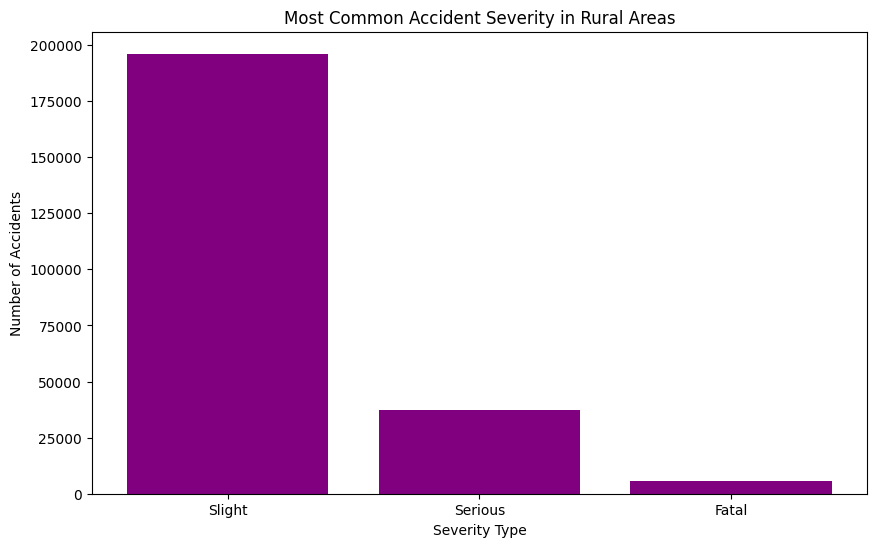

In [157]:
rural_sev_count = accident[accident['Urban_or_Rural_Area'] == 'Rural']['Accident_Severity'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(rural_sev_count.index, rural_sev_count.values, color='purple')
plt.title('Most Common Accident Severity in Rural Areas')
plt.xlabel('Severity Type')
plt.ylabel('Number of Accidents')
plt.show()

<h1 style="color:purple;">Insight 16</h1>
<h3>Accident Severity on Dry Roads</h3>

In [160]:
dry_road = accident[accident['Road_Surface_Conditions'] == 'Dry']['Accident_Severity'].value_counts()
dry_road

Accident_Severity
Slight     380395
Serious     61638
Fatal        5788
Name: count, dtype: int64

<h1 style="color:purple;">Insight 16</h1>
<h3>AAccident Severity on Dry Roads Graph</h3>

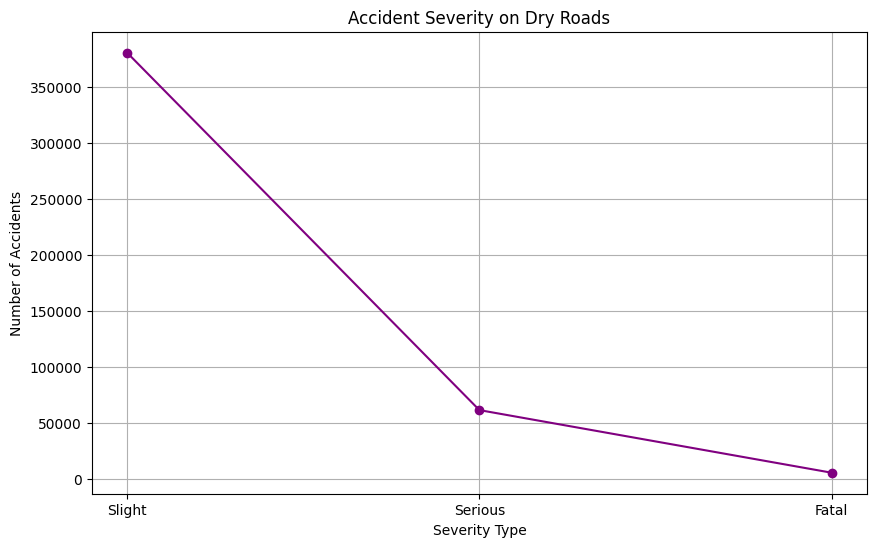

In [162]:
dry_road = accident[accident['Road_Surface_Conditions'] == 'Dry']['Accident_Severity'].value_counts()
plt.figure(figsize=(10, 6))
plt.plot(dry_road.index, dry_road.values, marker='o', linestyle='-', color='purple')
plt.title('Accident Severity on Dry Roads')
plt.xlabel('Severity Type')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()


<h1 style="color:purple;">Insight 17</h1>
<h3> Accident Severity in Urban vs. Rural Areas</h3>

In [171]:
sev_urban_rural = accident.groupby(['Urban_or_Rural_Area', 'Accident_Severity']).size().unstack()
sev_urban_rural

Accident_Severity,Fatal,Serious,Slight
Urban_or_Rural_Area,,,
Rural,5601,37312,196077
Unallocated,0,1,10
Urban,3060,50904,367714


<h1 style="color:purple;">Insight 17</h1>
<h3> Accident Severity in Urban vs. Rural Areas</h3>

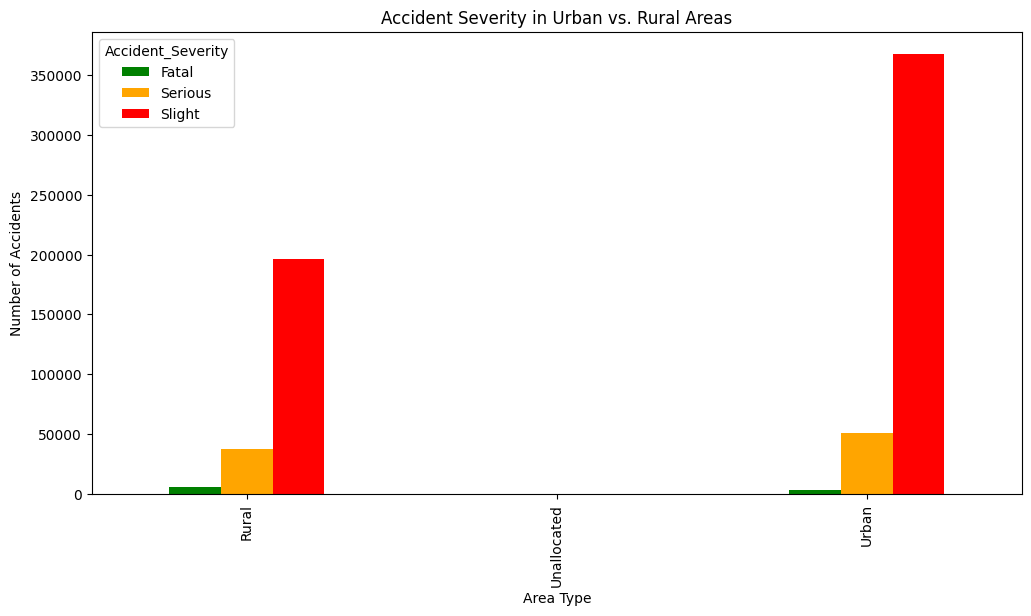

In [172]:
sev_urban_rural = accident.groupby(['Urban_or_Rural_Area', 'Accident_Severity']).size().unstack()
sev_urban_rural.plot(kind='bar', figsize=(12, 6), color=['green', 'orange', 'red'])
plt.title('Accident Severity in Urban vs. Rural Areas')
plt.xlabel('Area Type')
plt.ylabel('Number of Accidents')
plt.show()


<h1 style="color:purple;">Insight 18</h1>
<h3>Proportion of Fatal And Non-Fatal Accidents Among All Accidents</h3>

In [178]:
fatal_count = accident[accident['Accident_Severity'] == 'Fatal'].shape[0]
total_count = accident.shape[0]

<h1 style="color:purple;">Insight 18</h1>
<h3>Proportion of Fatal And Non-Fatal Accidents Among All Accidents Graph</h3>

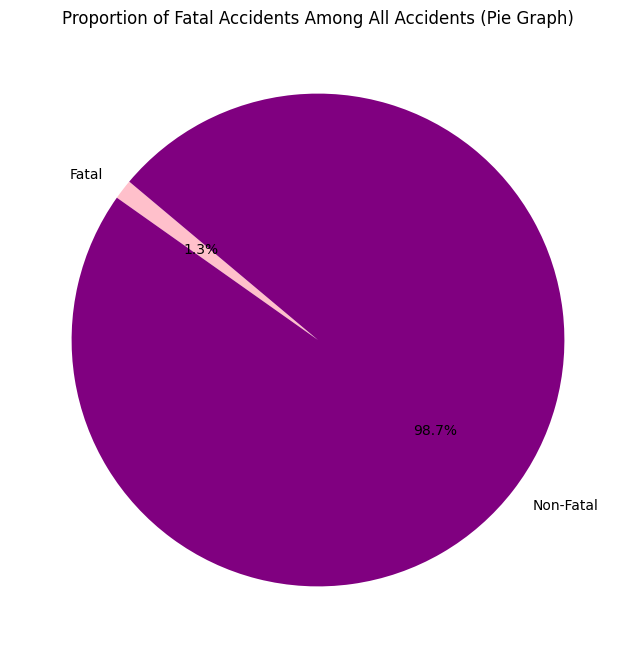

In [179]:
fatal_count = accident[accident['Accident_Severity'] == 'Fatal'].shape[0]
total_count = accident.shape[0]
fatal_proportion = (fatal_count / total_count) * 100
plt.figure(figsize=(8, 8))
plt.pie([fatal_count, total_count - fatal_count], labels=['Fatal', 'Non-Fatal'], autopct='%1.1f%%', colors=['pink', 'purple'], startangle=140)
plt.title('Proportion of Fatal Accidents Among All Accidents (Pie Graph)')
plt.show()


<h1 style="color:purple;">Insight 19</h1>
<h3> Top 5 Weather Conditions with the Highest Average Casualties </h3>

In [185]:
top_weather_cas = accident.groupby('Weather_Conditions')['Number_of_Casualties'].mean().sort_values(ascending=False).head(5).T
top_weather_cas

Weather_Conditions
Fog or mist              1.452948
Snowing + high winds     1.418079
Raining + high winds     1.416641
Raining no high winds    1.408214
Fine + high winds        1.386018
Name: Number_of_Casualties, dtype: float64

<h1 style="color:purple;">Insight 19</h1>
<h3> Top 5 Weather Conditions with the Highest Average Casualties Graph</h3>

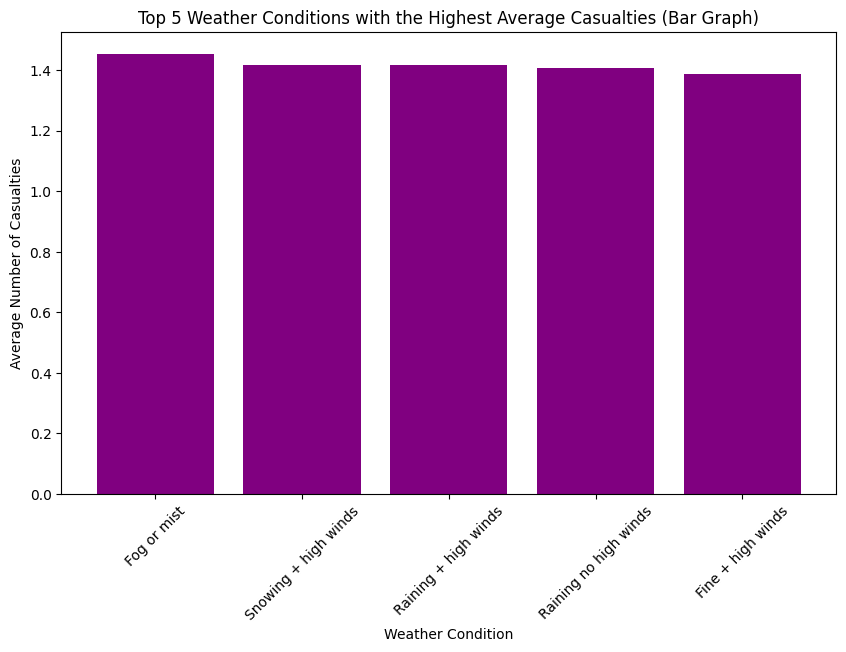

In [182]:
top_weather_cas = accident.groupby('Weather_Conditions')['Number_of_Casualties'].mean().sort_values(ascending=False).head(5)
top_weather_cas
plt.figure(figsize=(10, 6))
plt.bar(top_weather_cas.index, top_weather_cas.values, color='purple')
plt.title('Top 5 Weather Conditions with the Highest Average Casualties (Bar Graph)')
plt.xlabel('Weather Condition')
plt.ylabel('Average Number of Casualties')
plt.xticks(rotation=45)
plt.show()

<h1 style="color:purple;">Insight 20</h1>
<h3> Accidents on Wet vs. Dry Roads </h3>

In [187]:
road_cond_count = accident['Road_Surface_Conditions'].value_counts()
road_cond_count

Road_Surface_Conditions
Dry                           447821
Wet or damp                   186708
Frost or ice                   18517
Snow                            5890
Flood over 3cm. deep            1017
Unknown Surface Conditiion       726
Name: count, dtype: int64

<h1 style="color:purple;">Insight 20</h1>
<h3> Accidents on Wet vs. Dry Roads Graph</h3>

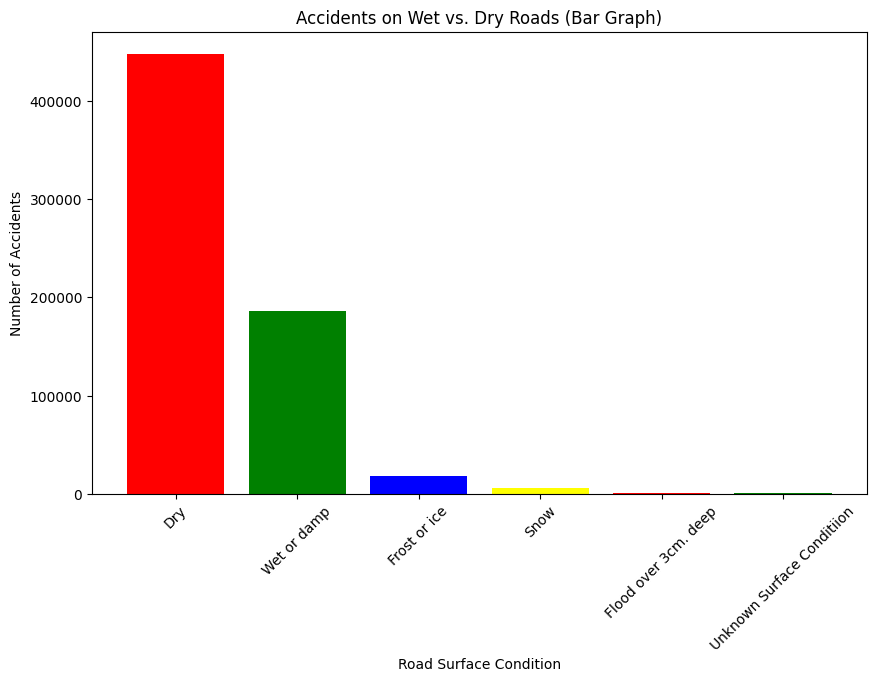

In [190]:
road_cond_count = accident['Road_Surface_Conditions'].value_counts()
road_cond_count
plt.figure(figsize=(10, 6))
plt.bar(road_cond_count.index, road_cond_count.values, color=['red', 'green', 'blue', 'yellow'])
plt.title('Accidents on Wet vs. Dry Roads (Bar Graph)')
plt.xlabel('Road Surface Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


In [49]:
accident.describe().T

,count,mean,min,25%,50%,75%,max,std
Accident Date,265007,2020-11-18 04:53:34.375468544,2019-01-01 00:00:00,2019-12-02 00:00:00,2020-11-05 00:00:00,2021-11-05 00:00:00,2022-12-12 00:00:00,NaN
Number_of_Casualties,660679.0,1.35704,1.0,1.0,1.0,1.0,68.0,0.824847
Number_of_Vehicles,660679.0,1.831255,1.0,1.0,2.0,2.0,32.0,0.715269
Year,265007.0,2020.407216,2019.0,2019.0,2020.0,2021.0,2022.0,1.101126
Month,265007.0,6.522028,1.0,4.0,7.0,10.0,12.0,3.467063
Day,265007.0,6.708374,1.0,4.0,7.0,10.0,12.0,3.445617
Day_Of_Week,265007.0,3.012203,0.0,1.0,3.0,5.0,6.0,1.987875


<h1>Graph Visualizations</h1>
<h1 style="color:purple;">Insight 1</h1>
<h4>Accident per month considering severity.</h4>

<function matplotlib.pyplot.show(close=None, block=None)>

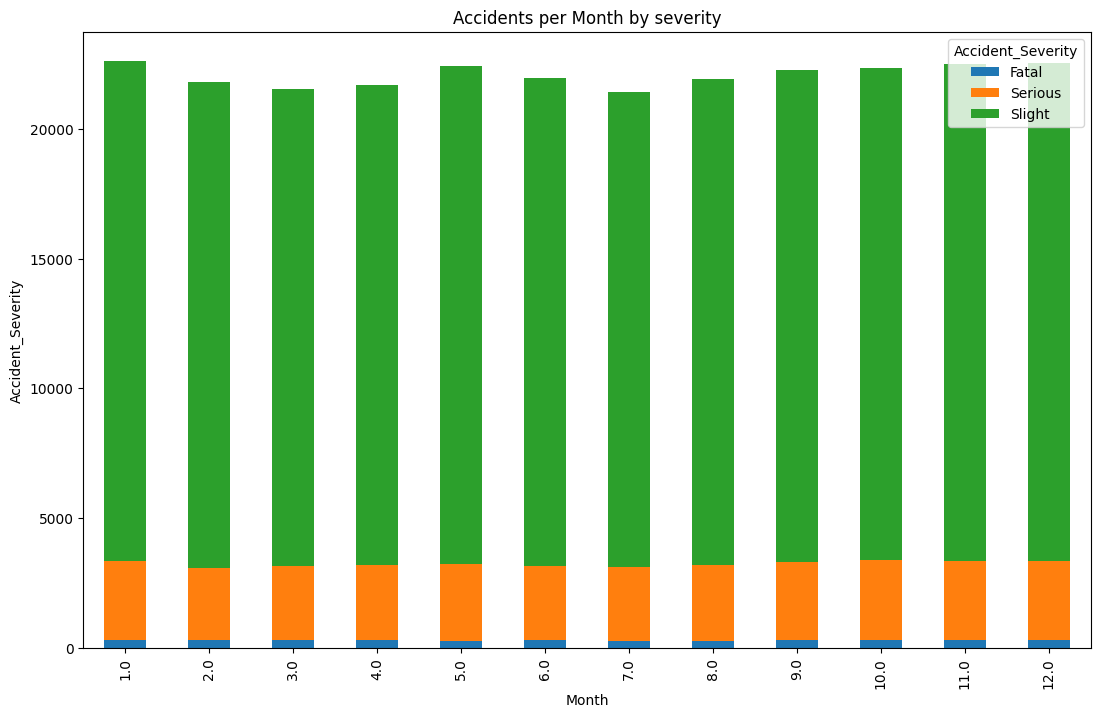

In [50]:
acci_month = accident.groupby(['Month', 'Accident_Severity']).size().unstack().fillna(0)
acci_month.plot(kind='bar', stacked=True)
plt.title('Accidents per Month by severity')
plt.xlabel('Month')
labels = ["January", "February", "March", "April"]
plt.ylabel('Accident_Severity')
plt.gcf().set_size_inches(13,8)
plt.show

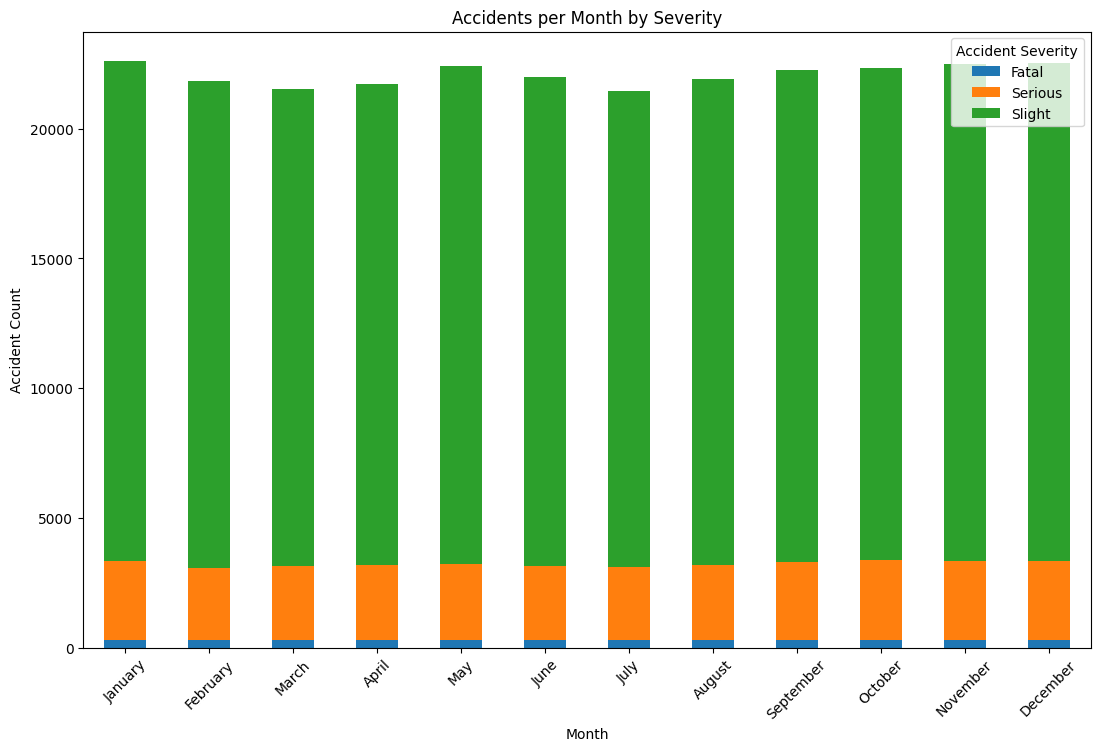

In [51]:
month_labels = ["January", "February", "March", "April", "May", "June",
                "July", "August", "September", "October", "November", "December"]

acci_month.plot(kind='bar', stacked=True)

plt.title('Accidents per Month by Severity')
plt.xlabel('Month')
plt.ylabel('Accident Count')
plt.gcf().set_size_inches(13, 8)
plt.legend(title='Accident Severity')

plt.xticks(ticks=range(len(month_labels)), labels=month_labels, rotation=45)
plt.show()

<h1 style="color:purple;">Insight 2</h1>
<h4>Most vehicle types that has been involved to accidents.</h4>

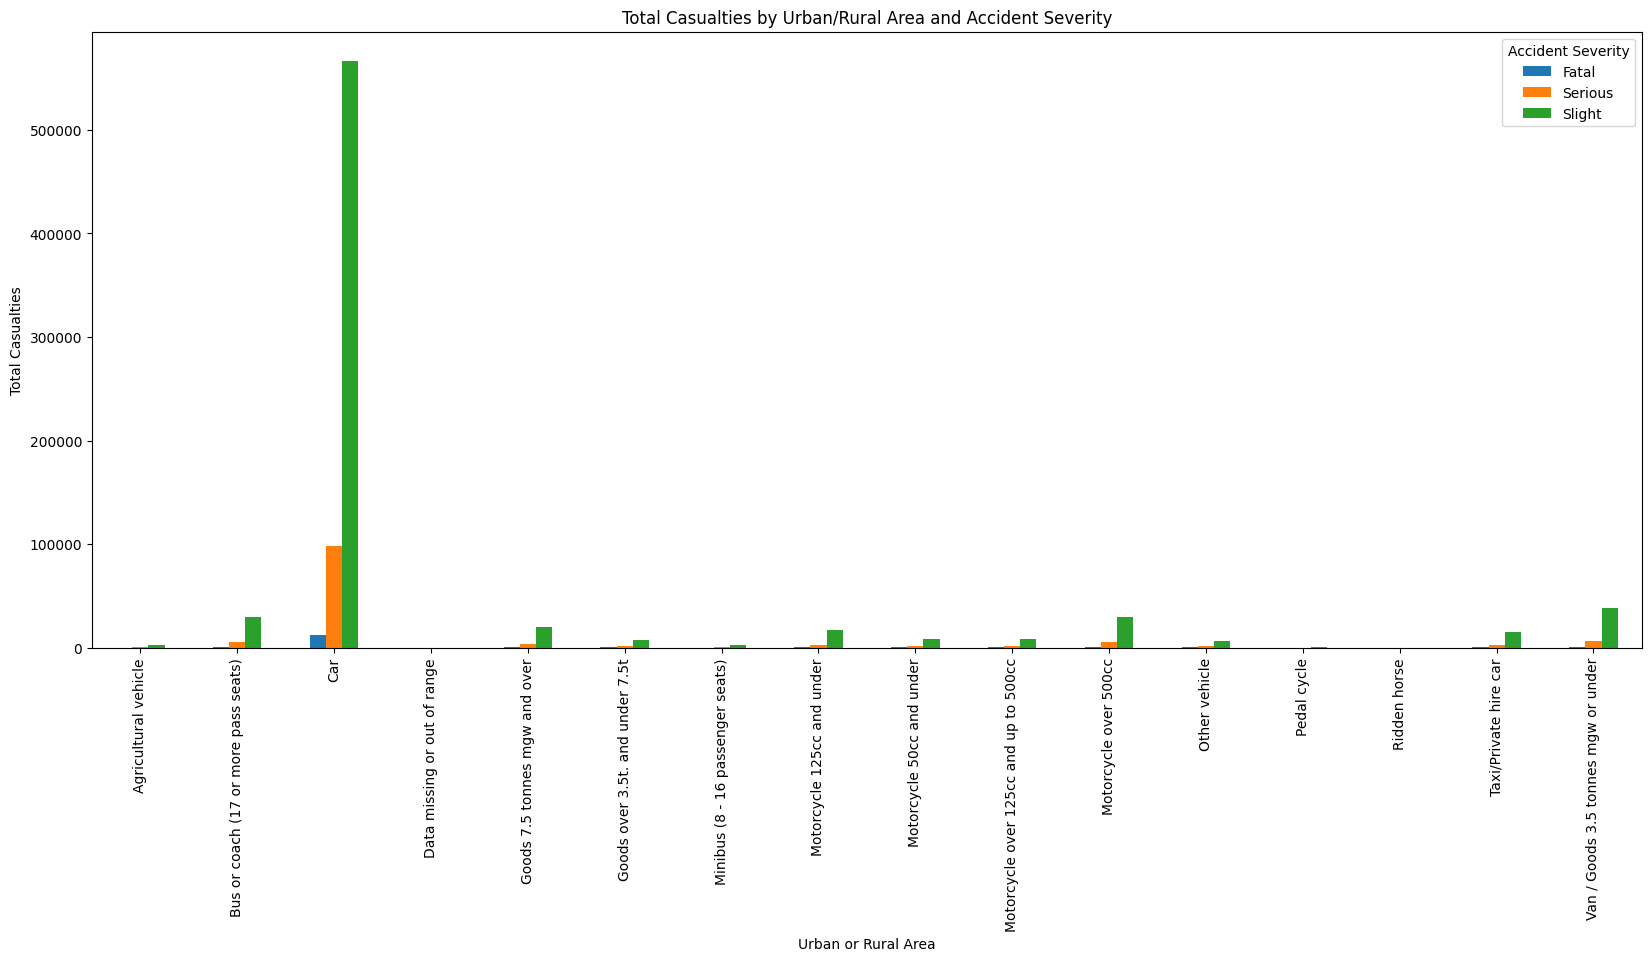

In [52]:
acci_df = accident.groupby(['Vehicle_Type', 'Accident_Severity'])['Number_of_Casualties'].sum().reset_index()
pivot_df = acci_df.pivot(index='Vehicle_Type', columns='Accident_Severity', values='Number_of_Casualties')

# pivot_df.plot(kind='bar', figsize=(10, 6))
pivot_df.plot(kind='bar')
plt.xticks(rotation=90)
plt.gcf().set_size_inches(20,8)
plt.legend(title="Accident Severity")
plt.ylabel("Total Casualties")
plt.xlabel("Urban or Rural Area")
plt.title("Total Casualties by Urban/Rural Area and Accident Severity")
plt.show()

<h1>Same Topic as the "Insight 1" but in Pie Chart</h1>

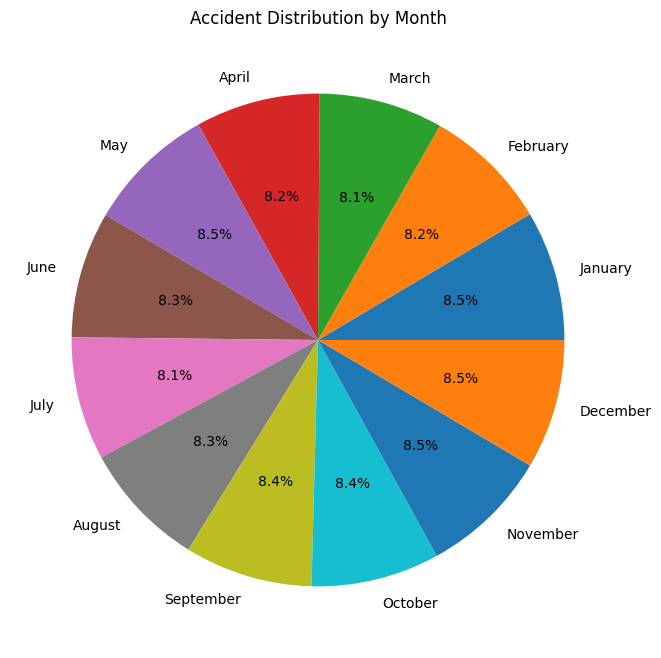

In [53]:
month_labels = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}

acci_total = acci_month.sum(axis=1)

acci_total.index = acci_total.index.map(month_labels)

plt.figure(figsize=(8, 8))
plt.pie(acci_total, labels=acci_total.index, autopct='%1.1f%%')

plt.title('Accident Distribution by Month')
plt.show()

<h1>Area Analysis</h1>

In [54]:
area_yr = accident.groupby(['District Area', 'Year']).size().reset_index(name = 'Accident_Count')
pervert_table = area_yr.pivot(index = 'Year', columns = 'District Area', values = 'Accident_Count')
pervert_table

District Area,Aberdeen City,Aberdeenshire,Adur,Allerdale,Alnwick,Amber Valley,Angus,Argyll and Bute,Arun,Ashfield,...,Wokingham,Wolverhampton,Worcester,Worthing,Wrexham,Wychavon,Wycombe,Wyre,Wyre Forest,York
Year,,,,,,,,,,,,,,,,,,,,,
2019.0,134,201,75,115,52,146,120,120,129,158,...,162,273,92,109,132,135,170,127,97,194
2020.0,203,299,78,138,46,137,116,109,135,145,...,153,259,85,101,156,177,190,124,95,172
2021.0,204,257,66,111,9,129,94,110,152,139,...,125,255,92,111,126,138,171,130,96,215
2022.0,0,0,46,79,0,107,0,0,139,104,...,101,214,82,82,120,101,164,115,93,171


<h1>Line Plot</h1>

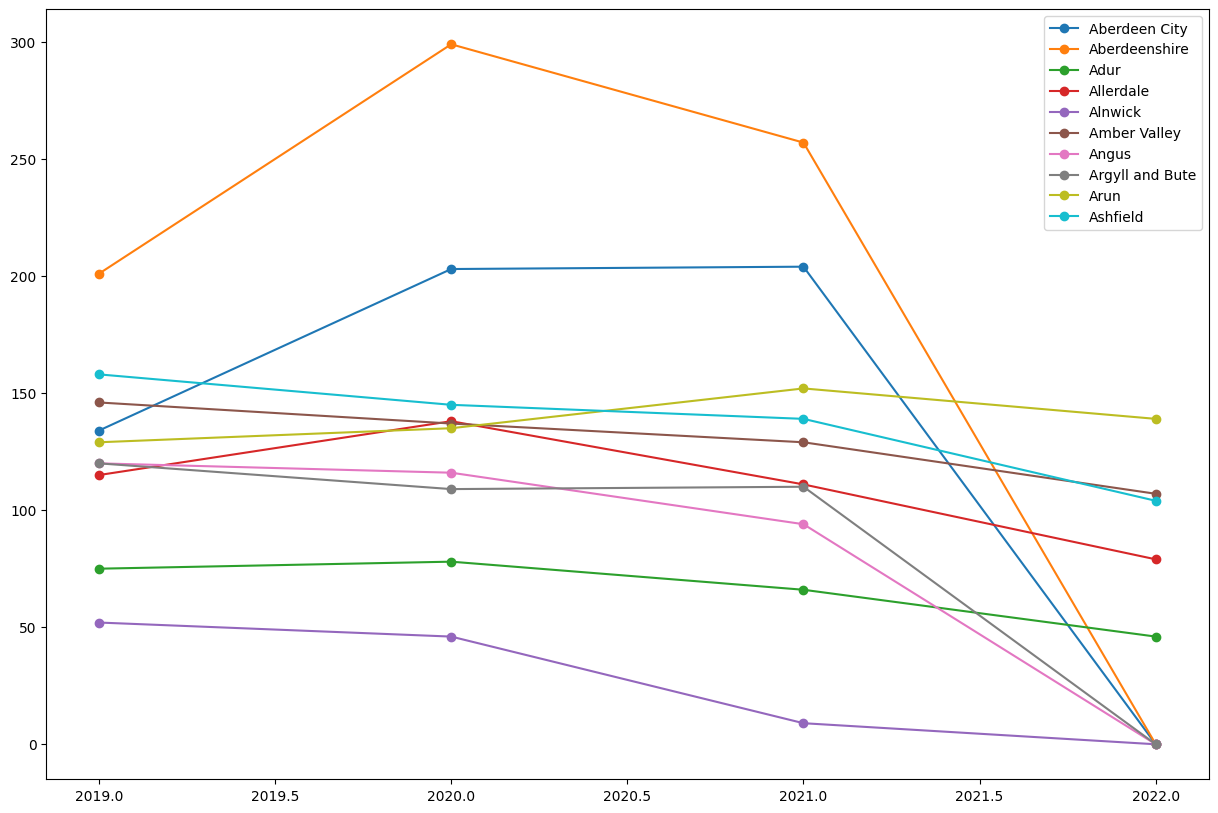

In [55]:
count = 0
for x in pervert_table:
    count += 1
    plt.plot(pervert_table.index,pervert_table[x], label = x, marker = 'o')
    if count == 10:
        break
plt.gcf().set_size_inches(15,10)
plt.legend()
plt.show()


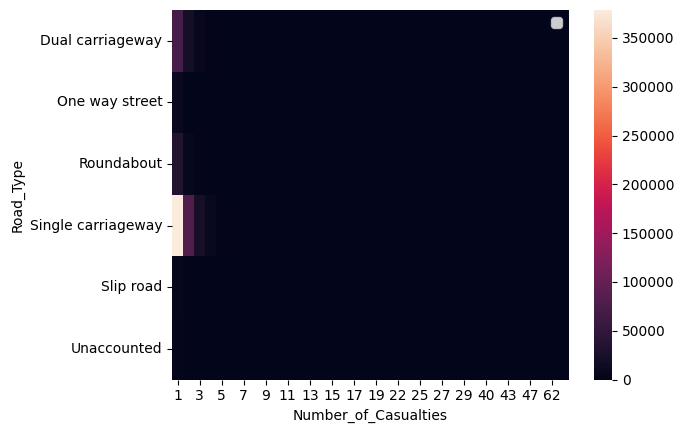

In [56]:
hot_road = accident.groupby(['Road_Type', 'Number_of_Casualties']).size().unstack()
sns.heatmap(hot_road)
plt.legend()
plt.show()